<a href="https://colab.research.google.com/github/ujamong/Practice/blob/main/%5B%EB%AC%B8%ED%99%94%5D%EC%98%81%ED%99%94_%EA%B4%80%EA%B0%9D%EC%88%98_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8_%EA%B0%9C%EB%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 영화 관객 수 데이터를 활용한 데이터 분석

감독, 이름, 상영등급, 스태프 수 등의 정보로 영화 관객 수를 예측하는 모델을 만들어 주세요!

## 1. 라이브러리 및 데이터

Library & Data

In [51]:
import pandas as pd # 판다스 패키지 불러오기
import lightgbm as lgb # 모델링 과정 집중 탐구위해

In [52]:
# 데이터 불러오기
train = pd.read_csv('/content/dacon_movie_data/movies_train.csv')
test = pd.read_csv('/content/dacon_movie_data/movies_test.csv')
submission = pd.read_csv('/content/dacon_movie_data/submission.csv') #답안지

## 2. 탐색적 자료분석

Exploratory Data Analysis (EDA)

### pd.DataFrame.head()

*   데이터 프레임의 위에서 부터 n개 행을 보여주는 함수
*   n의 기본 값(default 값)은 5



In [53]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387




*   title : 영화의 제목
*   distributor : 배급사
*   genre : 장르
*   release_time : 개봉일
*   time : 상영시간(분)
*   screening_rat : 상영등급
*   director : 감독이름
*   dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
*   dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
*   num_staff : 스텝수
*   num_actor : 주연배우수
*   box_off_num : 관객수



In [54]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [55]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


### pd.DataFrame.tail()

*   데이터 프레임의 아래에서 부터 n개 행을 보여주는 함수
*   n의 기본 값(default 값)은 5



In [56]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


### pd.DataFrame.shape

*   데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [57]:
print(train.shape) # 영화의 관객수에는 train의 학습데이터에만 주어짐
print(test.shape)
print(submission.shape) # test의 정답 옮겨 적어야 하므로 행이 같음

(600, 12)
(243, 11)
(243, 2)


### pd.DataFrame.info()



*   데이터셋의 column별 정보를 알려주는 함수
*   비어 있지 않은 값은 (not-null)은 몇개인지?
*   column의 type은 무엇인지?
*   type의 종류 : int(정수), float(실수), object(문자열), 등등 (date,...)
> *   type의 종류 : int(정수), float(실수), object(문자열), 등등 (date,...)




In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


### pd.DataFrame.describe()


*   숫자형 (int, float) column들의 기술 통계량을 보여주는 함수
*   기술통계량이란?
> *  해당 column을 대표할 수 있는 통계값들을 의미
*   기술통계량 종류
> * count : 해당 column에서 비어 있지 않은 값의 개수
> * mean : 평균
> * std : 표준편차
> * min : 최솟값(이상치 포함)
> * 25% (Q1) : 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
> * 50% (Q2) : 중앙값(전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
> * 75% (Q3) : 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
*   max: 최댓값 (이상치 포함)

*   이상치 : 울타리 밖에 있는 부분을 이상치라고 정의함
> * 아래쪽 울타리 : Q1 - 1.5*IQR
> * 위쪽 울타리 : Q3 - 1.5*IQR
> * IQR = Q3 - Q1





In [60]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [61]:
# e+02 -> 100**2
# e+06 -> 10**6

# 1.050443e+06	-> 1.050443 * 10 ** 6

In [62]:
# 원래 숫자대로 보고 싶다면
pd.options.display.float_format = '{:.1f}'.format

In [63]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


### pd.DataFrame.groupby()

*   집단에 대한 통계량 확인

In [64]:
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


### 상관계수

*   상관계수 : 두 개의 변수가 같이 일어나는 강도를 나타내는 수치
*   -1에서 1사이의 값을 지닙니다.
*   -1이나 1인 수치는 현실 세계에서 관측되기 힘든 수치입니다.
*   분야별로 기준을 정하는 것에 따라 달라지겠지만, 보통 0.4이상이면 두 개의 변수간에 상관성이 있다고 얘기함.

*   상관관계는 인과관계와 다릅니다. 아래의 예시를 확인해 봅시다.

*   선글라스 판매량이 증가함에 따라, 아이스크림 판매액도 같이 증가하는 것을 볼 수 있습니다.
*   하지만 선글라스 판매량이 증가했기 때문에 아이스크림 판매액이 증가했다라고 해석하는 것은 타당하지 않습니다.
*   선글라스 판매량이 증가했다는 것은 여름 때문이라고 볼 수 있으므로, 날씨가 더워짐에 따라 선글라스 판매량과 아이스크림 판매액이 같이 증가했다고 보는 것이 타당할 것입니다.

### pd.DataFrame.corr()

* correlation coefficient의 줄임말 입니다.

In [65]:
# display 값 복원하기
pd.reset_option('display.float_format')

In [66]:
train.corr()

# 직관적이지 않으므로 seaborn의 히트맵 이용

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


In [67]:
import seaborn as sns

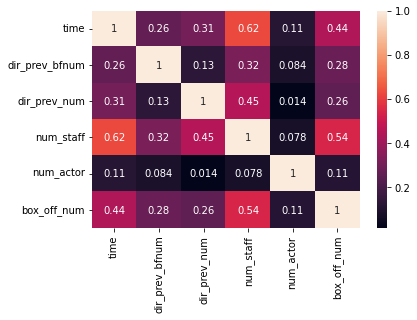

In [68]:
sns.heatmap(train.corr(), annot = True)

## 3. 데이터 전처리

Data Cleansing & Pre-Processing

### pd.Series.isna()

*   결측치 여부를 확인해줍니다.
*   결측치면 True, 아니면 False

In [69]:
train.isna().sum()

# False = 0, True = 1

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [70]:
train.isna().sum() / 600 # 행의 개수가 600개이므로 // %를 알 수 있음

title             0.00
distributor       0.00
genre             0.00
release_time      0.00
time              0.00
screening_rat     0.00
director          0.00
dir_prev_bfnum    0.55
dir_prev_num      0.00
num_staff         0.00
num_actor         0.00
box_off_num       0.00
dtype: float64

In [71]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [72]:
# 결측값 있는 부분만 추출/ 행만 추출
train[train['dir_prev_bfnum'].isna()]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [73]:
# 앞뒤로는 0이지만 중간에도 0인지 확인하기 위해 컬럼에 접근 후 sum을 통해 확인
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

In [74]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [75]:
# dir_prev_bfnum 컬럼에 심플하게 관객수가 없었을 것이라고 보고 0으로 채움

train['dir_prev_bfnum'].fillna(0, inplace=True) # inplace = True 로 하면 덮어씌어짐.

In [76]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [77]:
train.isna()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
595,False,False,False,False,False,False,False,False,False,False,False,False
596,False,False,False,False,False,False,False,False,False,False,False,False
597,False,False,False,False,False,False,False,False,False,False,False,False
598,False,False,False,False,False,False,False,False,False,False,False,False


In [78]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [79]:
test[test['dir_prev_bfnum'].isna()]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
5,회오리 바람,모쿠슈라,드라마,2010-02-25,95,15세 관람가,장건재,NaN,0,156,2
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,NaN,0,11,2
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,NaN,0,117,5
8,아마존의 눈물 극장판,마운틴픽쳐스,다큐멘터리,2010-03-25,88,15세 관람가,김진만,NaN,0,76,1
9,반가운 살인자,롯데쇼핑(주)롯데엔터테인먼트,코미디,2010-04-08,107,15세 관람가,김동욱,NaN,0,255,3
...,...,...,...,...,...,...,...,...,...,...,...
235,타이밍,(주)스톰픽쳐스코리아,애니메이션,2015-12-10,100,15세 관람가,민경조,NaN,0,56,1
237,어떤이의 꿈,하준사,드라마,2015-11-26,72,12세 관람가,조성규,NaN,0,29,3
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4


In [80]:
test[test['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

In [81]:
test['dir_prev_bfnum'].fillna(0, inplace = True)

In [82]:
# 잘 채워졌는지 확인
test.isna().sum() / 600

title             0.0
distributor       0.0
genre             0.0
release_time      0.0
time              0.0
screening_rat     0.0
director          0.0
dir_prev_bfnum    0.0
dir_prev_num      0.0
num_staff         0.0
num_actor         0.0
dtype: float64

### pd.DataFrame.fillna()

*   결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.
*   범주형 변수일 경우, 최빈값으로 대체할 수 있습니다.

## 4. 변수 선택 및 모델 구축

Feature Engineering & Initial Modeling

In [ ]:
# X (상영 시간, 영화 제작에 참여한 스태프수, 배우 수...) -> MODEL -> y (영화관객 수)

In [ ]:
# scikitlearn -> .fit()
# lgb -> .train()

In [83]:
# 관객수가 연속된 값이므로 이 문제(regression 문제)를 해결하기 위해 LGBMregressor를 사용
model = lgb.LGBMRegressor(random_state=777, n_estimators = 1000)
# random_state -> 어떤 환경에서든 같은 결과 값을 산출하기 위해 고정시킴.
# n_estimators = 1000 -> LGBM 특성상 이 파라미터가 들어감.


In [84]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor']
target = ['box_off_num'] # 예측해야 하는 변수

In [85]:
X_train, X_test, y_train = train[features], test[features], train[target]

## 5. 모델 학습 및 검증

Model Tuning & Evaluation

a. lightGBM (base model) ** 패키지에서 제공하는 base model

b. k-fold lightGBM (k-fold model) **교차검증

c. feature engineering (fe) ** feature 추가함.

d. grid search (hyperparameter tuning) ** 하이퍼파라미터 최적화 기법 // 최종적으로 이 모델을 튜닝해서 제출

a 에서 d로 갈수록 모델의 성능이 좋아짐.

#### LightGBM

*   부스팅 모델
*   기존 모델이 못 맞춘 문제에 가중치를 두어 지속적으로 학습 이어나감
*   타 부스팅 모델에 비해 속도가 빠름

순차적으로 진행

In [86]:
model.fit(X_train, y_train)

LGBMRegressor(n_estimators=1000, random_state=777)

In [87]:
# 답안지 옮겨적기
singleLGBM = submission.copy()

In [88]:
singleLGBM.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [89]:
# 예측값 산출 후 답안지 옮겨적기
singleLGBM['box_off_num'] = model.predict(X_test)

In [90]:
singleLGBM.head()

# 잘못예측된 것을 알 수 있음. 영화 관객 수가 음수 값이 나올 수 없음.
# 모델의 성능이 안 좋은 것을 알 수 있음.

,title,box_off_num
0,용서는 없다,2.817995e+06
1,아빠가 여자를 좋아해,3.753772e+05
2,하모니,-5.693243e+05
3,의형제,1.581189e+06
4,평행 이론,-5.277806e+05


In [91]:
singleLGBM.to_csv('singleLGBM.csv', index = False)

# 다운로드 후 데이콘에 제출
# 본인 점수 확인
# 점수 상승 가능한지 다시 생각해보기

### k-fold 교차검증 (k-fold cross validation)


*   과대적합 방지  (위해 사용)
*   모델 간 일반적인 성능 비교
*   validation set, development set

n등분 후 1부분 빼고 나머지 부분 학습, 1부분으로 test 진행

임시적인 test set 만듦

n개의 예측 값들을 평균을 내주면 앙상블 효과도 어느 정도 부여됨.

LGBM에는 early_stopping_rounds 중요 요소
과적합 위험 때문, 어느 적정 시점에서 잘 끊어줘야 함.

In [92]:
from sklearn.model_selection import KFold

In [93]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [94]:
k_fold = KFold(n_splits=5, shuffle = True, random_state=777)
# shuffle -> 무작위로 섞어줌. data의 순서에 따른 영향이 있을 수 있으므로 / 시계열은 제외

In [97]:
for train_idx, val_idx in k_fold.split(X_train):
    print(train_idx, val_idx)
    
    # train용, test용 인덱스
    print(len(train_idx), len(val_idx))  # 480 120  // 5등분으로 나눠진 것을 확인할 수 있음.

    break

[  0   1   2   3   4   5   6   7   8  10  11  13  14  15  16  17  19  20
  23  27  28  29  30  31  32  33  34  35  37  38  40  41  42  43  44  45
  48  49  50  51  53  57  58  59  60  61  62  63  64  65  66  67  68  70
  71  72  74  76  77  78  79  80  81  82  83  84  85  87  91  92  93  94
  95  98  99 100 102 103 104 105 107 108 109 110 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 129 130 131 133 136 137 138 139
 140 141 142 144 147 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 201 202 203 204 205 206 207 208 209 211 212 213 214 215 216 218 219
 220 221 223 224 225 226 227 228 229 230 231 232 233 237 238 239 240 242
 243 244 245 248 249 250 251 253 254 257 258 259 260 261 263 264 265 266
 268 270 271 272 274 276 277 278 279 280 282 285 286 288 292 294 295 296
 297 298 299 300 301 302 303 305 306 307 308 309 31

In [99]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)
# model 초기화

# model 5개를 한 번에 담을 바구니
models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]

    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose=100))
    # validation 데이터는 소괄호로 묶어서 'eval_set' 옵션에 넣어줌.
    # train set은 x_t, y_t로 순차적으로 넣기
    # early_stopping_rounds=100 -> 1000번 돌릴 예정인데, 100번의 과정동안 유의미한 성능증가가 되지 않는다면/오차율이 감소되지 않는다면 학습을 멈춰라
    #   그 평가 기준을 eval_set으로 진행
    # verbose = 100 -> 1000번 돌리는 동안 100번 마다 모델에 대한 출력 값을 산출해달라.



Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.70572e+12
Early stopping, best iteration is:
[6]	valid_0's l2: 2.45438e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.90847e+12
Early stopping, best iteration is:
[33]	valid_0's l2: 3.72825e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.50344e+12
Early stopping, best iteration is:
[8]	valid_0's l2: 2.58737e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.45977e+12
Early stopping, best iteration is:
[11]	valid_0's l2: 1.26226e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.77214e+12
Early stopping, best iteration is:
[22]	valid_0's l2: 1.57631e+12


In [101]:
models

[LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777)]

In [102]:
preds = []

for model in models:
    preds.append(model.predict(X_test))
    # X_test에 대한 model predict 실행, preds에 담음
len(preds)

5

In [104]:
# 예측값 산출 위해 답안지 만들기
kfoldLightGBM = submission.copy()

In [105]:
preds
# 해당 값들을 평균 낼 예정

[array([3367422.08211024,  961138.88337016, 1097929.67851313,
        2097270.81999921,  781476.31131047,  123133.23396977,
          84085.01896248,  199222.92670303,  124854.97973097,
        1072684.78820647,  657040.55769984, 1644701.47160779,
         924735.72080619,  191699.58415836,  723218.39948755,
        2395613.42888462,  113180.54906592, 1882765.92812296,
          97286.47282983,  417270.42113431,  161482.3367577 ,
          63495.73363115,  598057.42337284,  249411.25868881,
         308424.71884273, 1319518.60852241,  202273.52740684,
        1076683.13768137,  491636.41945325,  183406.6380314 ,
        1740233.45816734,   86696.17528125,  440430.29773088,
        2040944.13061099,  113375.45695331,  531746.29484356,
         106207.35971699,  169560.79581187,  158101.0895316 ,
          95037.29701059,  466355.50624629,  197548.63265325,
         198810.0901353 ,  682743.4340129 ,  679265.22397749,
         617812.91125278,  219182.85833837,   83712.10602149,
        

In [108]:
import numpy as np

In [109]:

kfoldLightGBM['box_off_num'] = np.mean(preds, axis = 0)

In [110]:
kfoldLightGBM.to_csv('kfoldLightGBM.csv', index=False)

# 데이콘 제출
# 성능이 올라간 것을 알 수 있음

### feature engineering

추가 변수 활용

In [111]:
features

['time', 'dir_prev_num', 'num_staff', 'num_actor']

In [112]:
train.columns
# 'dir_prev_bfnum', 'genre' 컬럼 활용

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [113]:
train.genre
# datatype이 object인 것을 알 수 있음.
# 모델에 입력할 때에는 숫자로 변환되어야 함.

0       액션
1      느와르
2       액션
3      코미디
4      코미디
      ... 
595    드라마
596    드라마
597     공포
598    느와르
599     액션
Name: genre, Length: 600, dtype: object

In [114]:
# sklearn에 있는 LabelEncoder()를 활용해서 문자열 값을 숫자로 변환하자

# fit_transform -> 고유단어 하나씩 번호 부여함.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['genre'] = le.fit_transform(train['genre'])

In [115]:
train['genre']

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int64

In [116]:
# test도 바꿔줌
test['genre'] = le.transform(test['genre'])

In [117]:
# train -> fit_transform
# test -> transform 
# 둘의 코드가 다름
# fit_ 같은 경우는 모델 학습할 때 썼음.
#  각각의 단어를 어떤 숫자로 변환할지 학습하는 과정
#  이미 이 과정에서 학습했으므로 다시 학습할 필요는 없음.

# test에서는 그냥 transform만 쓰면 train 데이터에서 학습한 숫자와 동일하게 test['genre']에 입력됨.
#  test에서 fit_transform을 해주면 test에서 변환된 숫자랑 train에서 변환된 숫자랑 다를 수 있음.

In [118]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor', 'dir_prev_bfnum', 'genre']
# 컬럼 추가

In [119]:
X_train, X_test, y_train = train[features], test[features], train[target]

In [121]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

models = []

for train_idx, val_idx, in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]

    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds = 100, verbose=100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.62067e+12
Early stopping, best iteration is:
[9]	valid_0's l2: 2.42668e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 4.39227e+12
Early stopping, best iteration is:
[23]	valid_0's l2: 3.97173e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.29841e+12
Early stopping, best iteration is:
[10]	valid_0's l2: 2.53643e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.56499e+12
Early stopping, best iteration is:
[16]	valid_0's l2: 1.21201e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.60118e+12
Early stopping, best iteration is:
[29]	valid_0's l2: 1.47528e+12


In [123]:
X_test

,time,dir_prev_num,num_staff,num_actor,dir_prev_bfnum,genre
0,125,2,304,3,3.005290e+05,2
1,113,4,275,3,3.427002e+05,5
2,115,3,419,7,4.206611e+06,4
3,116,2,408,2,6.913420e+05,10
4,110,1,380,1,3.173800e+04,1
...,...,...,...,...,...,...
238,78,1,4,4,2.590000e+03,4
239,86,0,18,2,0.000000e+00,3
240,107,0,224,4,0.000000e+00,2
241,102,1,68,7,5.069900e+04,4


In [122]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
len(preds)

5

In [124]:
# 새 답안지 생성
feLightGBM = submission.copy()

In [125]:
feLightGBM['box_off_num'] = np.mean(preds, axis = 0)

In [126]:
feLightGBM.to_csv('feLightGBM.csv', index = False)

# 데이콘 제출
# 성능이 더 좋아진 것을 알 수 있음

In [127]:
# 모델을 튜닝해서 성능이 더 좋아질 수 있는지 확인하기

### Grid Search

모델 튜닝에 쓰는 가장 대표적인 것

모델 튜닝 : 모델 안의 옵션들이 바뀔 때마다 성능이 미세하게 달라질 수 있음. 파라미터들의 값들을 바꿀 때마다 오차율이 적을 수록 좋음.

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
# GridSearchCV 불러온 후 GridSearchCV 객체 만들어 주기 
# 여기서는 gs

model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

params = {
    'learning_rate' : [0.1, 0.01, 0.003],
    'min_child_samples' : [20, 30]
    # 3:2 -> 2개의 파라미터를 6개 조합으로 
    # 'learning_rate' -> 순차적으로 boosting 할 때, 기존 모델에 대한 성능을 얼마만큼 다음 모델에 반영할 것인가
    #    값이 적을수록 점점 더 미세하게 그 모델에 대한 변화가 이루어짐. 
}

gs = GridSearchCV(estimator=model,
                  param_grid = params,
                  scoring = 'neg_mean_squared_error', # 평가지표에 따라 다름 // 여기서는 RMS가 평가지표
                  # scoring은 오차율 위치에 해당, 여기서는 오차율 대신 n_m_s_e
                  cv = k_fold) # CrossValidation -> k_fold라고 넣어도 되고 5를 넣어도 됨.

In [130]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=LGBMRegressor(n_estimators=1000, random_state=777),
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [131]:
gs.best_params_
# 가장 좋았던 조합 보기

{'learning_rate': 0.003, 'min_child_samples': 30}

In [132]:
# 위의 best_params를 이용해 옵션 값에 넣어줌
# 새로운 모델 만들기
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000, learning_rate=0.003, min_child_samples=30)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]

    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds = 100, verbose = 100))

# 335번째, 876번째 등이 가장 좋았던 것을 알 수 있음.

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.56673e+12
[200]	valid_0's l2: 2.45583e+12
[300]	valid_0's l2: 2.42575e+12
[400]	valid_0's l2: 2.43392e+12
Early stopping, best iteration is:
[335]	valid_0's l2: 2.42348e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 4.89194e+12
[200]	valid_0's l2: 4.40922e+12
[300]	valid_0's l2: 4.19146e+12
[400]	valid_0's l2: 4.05951e+12
[500]	valid_0's l2: 3.96931e+12
[600]	valid_0's l2: 3.91727e+12
[700]	valid_0's l2: 3.88462e+12
[800]	valid_0's l2: 3.87695e+12
[900]	valid_0's l2: 3.87088e+12
Early stopping, best iteration is:
[876]	valid_0's l2: 3.87035e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.14361e+12
[200]	valid_0's l2: 2.79286e+12
[300]	valid_0's l2: 2.59302e+12
[400]	valid_0's l2: 2.47608e+12
[500]	valid_0's l2: 2.40386e+12
[600]	valid_0's l2: 2.36407e+12
[700]	valid_0's l2: 2.38505e+12
Early stopping, best iteration is:
[6

In [133]:
preds = []

for model in models:
    preds.append(model.predict(X_test))

In [134]:
gs.best_score_

-2334525343085.6494

In [135]:
gslgbm = submission.copy()

In [136]:
gslgbm['box_off_num'] = np.mean(preds, axis = 0)

In [137]:
gslgbm.to_csv('gslgbm.csv', index = False)

# 데이콘 업로드
# 기존 값들보다 성능이 안 좋아진 것을 확인
# 훈련데이터 많은 것이 좋음.

## 6. 결과 및 결언

Conclusion & Discussion